# Exercise 1

about solving and ODE numerically

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def derivative(t,y):
    return t * (1 - y**2)

In [3]:
# returns y(t+dt)
def euler_iteration(t,y, dt):
    return y + derivative(t,y) * dt

def RK4_iteration(t,y,dt):
    k1 = derivative(t,y)
    k2 = derivative(t + dt/2, y + dt * k1/2)
    k3 = derivative(t + dt/2, y + dt * k2/2)
    k4 = derivative(t + dt, y + dt * k3)
    return y + dt * (k1 + 2*k2 + 2*k3 + k4 ) / 6

# THIRD METHOD: Scipy build in function
from scipy.integrate import odeint
def scipy_solver(t):
    return odeint(derivative, y0=-.5, t=t, tfirst=True)
    

def y_analytical(t):
    c_1 = -.5
    return (np.exp(t**2) - 3)/(3 + np.exp(t**2))

y_analytical = np.vectorize(y_analytical)

In [5]:
y_0 = -.5

def error(dt):
    t = np.linspace(0,5, num=int(5 / dt))
    y_euler = np.zeros_like(t)
    y_euler[0] = y_0
    y_RK4 = np.zeros_like(t)
    y_RK4[0] = y_0
    dt = t[1]

    for i in range(1, len(t)):
        y_euler[i] = euler_iteration(t[i-1],y_euler[i-1],dt)
        y_RK4[i] = RK4_iteration(t[i-1],y_RK4[i-1],dt)


    y_anal = y_analytical(t)
    y_scipy = scipy_solver(t)
    y_scipy = y_scipy.reshape(y_scipy.shape[0])

    error_euler = y_euler - y_anal
    error_RK4 = y_RK4 - y_anal
    error_scipy = y_scipy - y_anal

    return error_euler, error_RK4, error_scipy, y_anal, t

## 1.1 Plot error function

In [6]:
def make_plot(dt):
    error_euler, error_RK4, error_scipy, y_anal, t = error(dt)
    error_euler =  np.abs(error_euler)
    error_RK4 = np.abs(error_RK4)
    error_scipy = np.abs(error_scipy)

    plt.plot(t,error_euler, label=rf'Euler $dt = {dt}$')
    plt.plot(t,error_RK4, label=rf'Runge Kutta $dt = {dt}$')
    plt.plot(t,error_scipy, label=rf'scipy.integrate.odeint $dt = {dt}$')


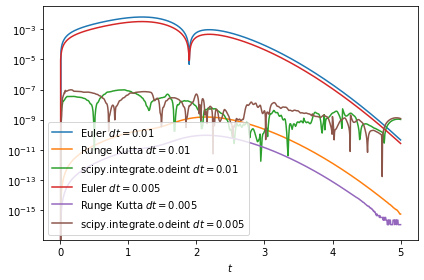

In [7]:
make_plot(.01)
make_plot(.005)


plt.xlabel(r'$t$')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('build/Ex1-1.pdf')

## 1.2 comapring error for different dt

In [8]:
def max_error(dt):
    error_euler, error_RK4, error_scipy, y_anal, t = error(dt)
    error_euler =  np.max(np.abs(error_euler))
    error_RK4 = np.max(np.abs(error_RK4))
    error_scipy = np.max(np.abs(error_scipy))

    return error_euler, error_RK4, error_scipy

def errors(dt):
    errors_euler = []
    errors_RK4 = []
    errors_scipy = []
    for h in dt:
        error_euler, error_RK4, error_scipy = max_error(h)
        errors_euler.append(error_euler)
        errors_RK4.append(error_RK4)
        errors_scipy.append(error_scipy)
    return errors_euler, errors_RK4, errors_scipy

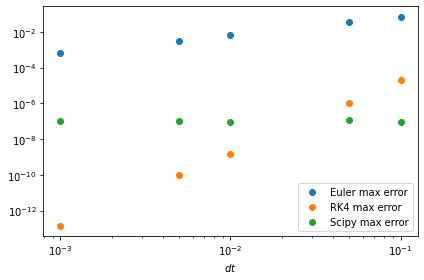

In [12]:
dt = [.1,.05,.01,.005,.001]
errors_euler, errors_RK4, errors_scipy = errors(dt)
plt.scatter(dt, errors_euler, label='Euler max error')
plt.scatter(dt, errors_RK4, label='RK4 max error')
plt.scatter(dt, errors_scipy, label='Scipy max error')

plt.xlabel(r'$dt$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('build/Ex1-2.pdf')